## Simple Liner Regression 

In [2]:
class MyLr:
    def __init__(self):
        self.m = None
        self.b = None
        
    def fit(self, x_train, y_train): 
        self.m = sum( (x_train - x_train.mean()) * (y_train - y_train.mean())  ) / sum((x_train - x_train.mean()) ** 2  )
        self.b = y_train.mean() - self.m * x_train.mean()
        print("coefficient", self.m)
        print("intercept", self.b)
        
    def predict(self, x_test):
        return self.m * x_test + self.b
        

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
data = pd.read_csv("../datasets/advertising.csv")
df = data[["TV","Sales"]]
df

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,12.0
3,151.5,16.5
4,180.8,17.9
...,...,...
195,38.2,7.6
196,94.2,14.0
197,177.0,14.8
198,283.6,25.5


In [5]:
x = df["TV"].values
y = df["Sales"].values
x
y.shape

(200,)

### spliting data for train and test

In [6]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train ,y_test = train_test_split(x,y , test_size = 0.2)

In [7]:
x_train.shape

(160,)

### Training model

In [8]:
lr = MyLr()

In [9]:
lr.fit(x_train, y_train)

coefficient 0.05541813097526496
intercept 7.005009544230889


In [10]:
lr.predict(x_test[34])

np.float64(20.205608342539)

### Best fit line

In [11]:
y_pred = lr.predict(x_test)

Text(0, 0.5, 'Sales')

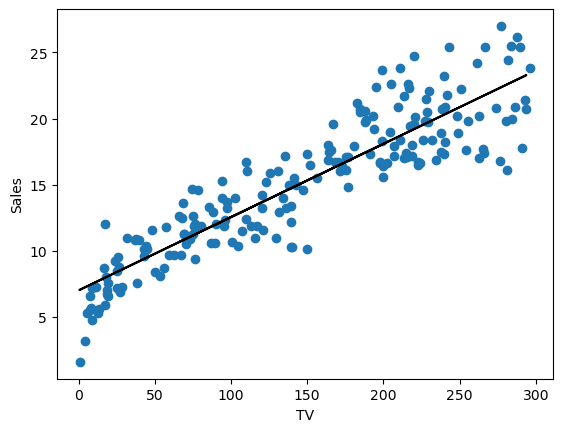

In [14]:
plt.scatter(x, y)
plt.plot(x_train, lr.predict(x_train), color = "black")
plt.xlabel("TV")
plt.ylabel("Sales")

### calculating efficiency

In [15]:
from sklearn.metrics import r2_score

In [16]:
r2 = r2_score(y_test, y_pred)
r2

0.8628588732837295

#### my model is 86 percent accurate